##EE 399
##Sam Tam
##4/15/23
##HW 2

In [48]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.linalg import eigh

##Part A

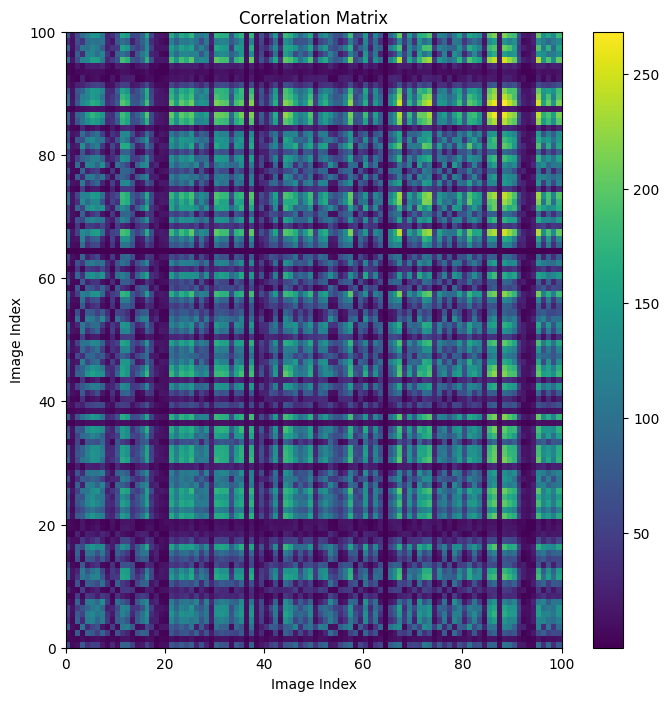

In [49]:
# Load the .mat file
results = loadmat('/yalefaces.mat')
X = results['X']

# Compute the correlation matrix
X_100 = X[:, :100]  # Select the first 100 columns of X
C = np.dot(X_100.T, X_100)  # Compute the dot product of X_100 with its transpose

# Plot the correlation matrix using pcolor
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pcolor(C)  # Plot the correlation matrix
plt.colorbar()  # Add a colorbar
plt.title('Correlation Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()  # Show the plot

##Part B

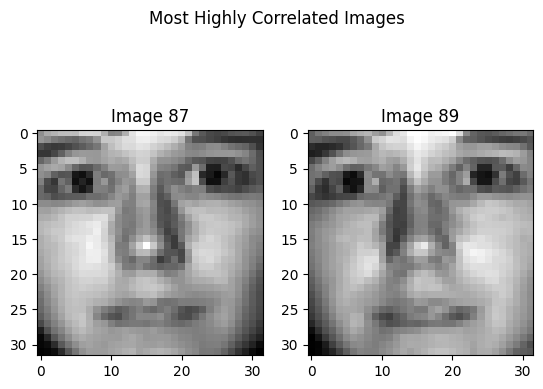

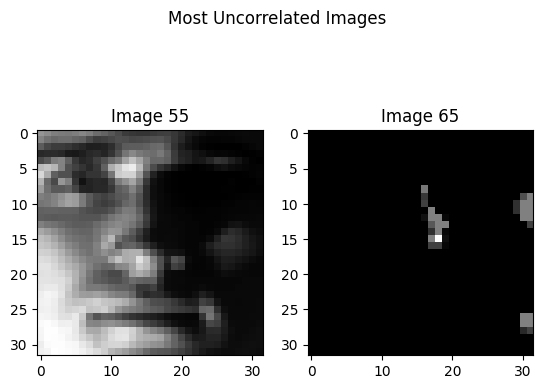

In [50]:
# Find the indices of the most highly correlated and most uncorrelated images
i, j = np.unravel_index(np.argmax(C - np.eye(C.shape[0])*np.max(C)), C.shape)
k, l = np.unravel_index(np.argmin(C + np.eye(C.shape[0])*np.max(C)), C.shape)

# Plot the most highly correlated images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(X[:, i].reshape(32, 32), cmap='gray')
axs[0].set_title(f"Image {i+1}")
axs[1].imshow(X[:, j].reshape(32, 32), cmap='gray')
axs[1].set_title(f"Image {j+1}")
plt.suptitle("Most Highly Correlated Images")

# Plot the most uncorrelated images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(X[:, k].reshape(32, 32), cmap='gray')
axs[0].set_title(f"Image {k+1}")
axs[1].imshow(X[:, l].reshape(32, 32), cmap='gray')
axs[1].set_title(f"Image {l+1}")
plt.suptitle("Most Uncorrelated Images")

plt.show()

##Part C

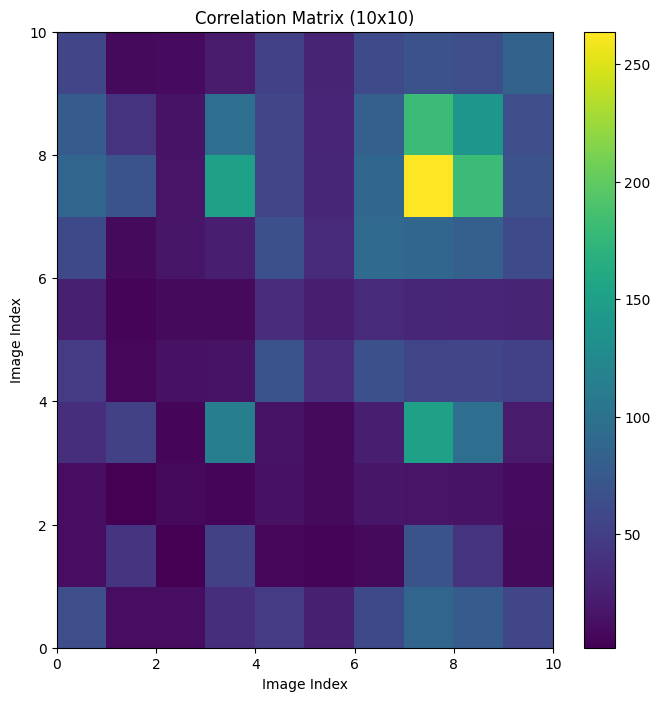

In [52]:
# Select the specific image indices for computing the correlation matrix
image_indices = [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]  # 1-based indexing

# Extract the corresponding image columns from X
X_10 = X[:, image_indices]

# Compute the correlation matrix
C_10 = np.dot(X_10.T, X_10)  # Compute the dot product of X_10 with its transpose

# Plot the correlation matrix using pcolor
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pcolor(C_10)  # Plot the correlation matrix
plt.colorbar()  # Add a colorbar
plt.title('Correlation Matrix (10x10)')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()  # Show the plot


##Part D

In [53]:
# Compute the matrix Y as X times its transpose
Y = np.dot(X.T, X)

# Compute the eigenvalues and eigenvectors of Y
eigenvalues, eigenvectors = eigh(Y)

# Sort the eigenvalues in descending order
idx = np.argsort(eigenvalues)[::-1]

# Select the first six eigenvectors with the largest magnitude eigenvalues
eigenvectors_largest = eigenvectors[:, idx[:6]]

# Normalize the eigenvectors
eigenvectors_largest_normalized = eigenvectors_largest / np.linalg.norm(eigenvectors_largest, axis=0)

print(eigenvectors_largest_normalized)


[[-0.01219331  0.01938848 -0.01691206  0.0204079  -0.01902342  0.0090084 ]
 [-0.00215188  0.00195186 -0.00143586 -0.01201431  0.00418948  0.00624237]
 [-0.01056679 -0.02471869 -0.0384465   0.00397553  0.0384026  -0.01580824]
 ...
 [-0.02177117 -0.04027773 -0.01340245 -0.01641295 -0.01092512  0.00977639]
 [-0.03015309 -0.00219562  0.01883373 -0.04011563  0.00087341 -0.00090316]
 [-0.0257889  -0.01553129 -0.00643709  0.02679029  0.01260435 -0.00304479]]


##Part E

In [54]:
# Perform SVD on X
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Extract the first six principal component directions
principal_component_directions = Vt[:6, :]  # Extract the first six rows of Vt

# Transpose the principal component directions to have one direction per column
principal_component_directions = principal_component_directions.T

print(principal_component_directions)

[[-0.01219331  0.01938848 -0.01691206 -0.0204079   0.01902342  0.0090084 ]
 [-0.00215188  0.00195186 -0.00143586  0.01201431 -0.00418948  0.00624237]
 [-0.01056679 -0.02471869 -0.0384465  -0.00397553 -0.0384026  -0.01580824]
 ...
 [-0.02177117 -0.04027773 -0.01340245  0.01641295  0.01092512  0.00977639]
 [-0.03015309 -0.00219562  0.01883373  0.04011563 -0.00087341 -0.00090316]
 [-0.0257889  -0.01553129 -0.00643709 -0.02679029 -0.01260435 -0.00304479]]


##Part F

In [55]:
# Extract the first eigenvector v1
v1 = eigenvectors_largest_normalized[:, 0]
# Extract the first SVD mode u1
u1 = principal_component_directions[:, 0]
# Compute the norm of difference of absolute values
norm_diff = np.linalg.norm(np.abs(v1) - np.abs(u1))

print(f'Norm of difference between v1 and u1: {norm_diff}')

Norm of difference between v1 and u1: 1.0688749744602884e-15


##Part G

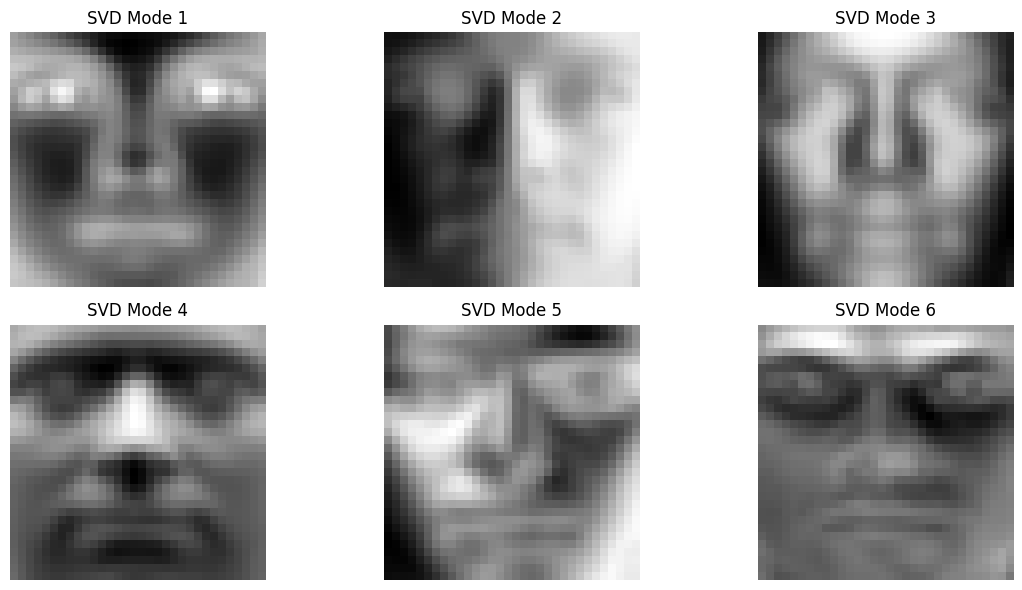

Percentage of Variance Captured by SVD Mode 1: 72.93%
Percentage of Variance Captured by SVD Mode 2: 15.28%
Percentage of Variance Captured by SVD Mode 3: 2.57%
Percentage of Variance Captured by SVD Mode 4: 1.88%
Percentage of Variance Captured by SVD Mode 5: 0.64%
Percentage of Variance Captured by SVD Mode 6: 0.59%


In [56]:
# Perform Singular Value Decomposition (SVD) on X
U, S, VT = np.linalg.svd(X)

# Extract the singular values
singular_values = S[:6]
# Compute the percentage of variance captured by each SVD mode
variance_percentage = (singular_values ** 2) / (np.sum(S ** 2)) * 100

# Plot the first 6 SVD modes
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(U[:, i].reshape(32, 32), cmap='gray')
    plt.axis('off')
    plt.title(f'SVD Mode {i+1}')

plt.tight_layout()
plt.show()

# Print the percentage of variance captured by each SVD mode
for i in range(6):
    print(f'Percentage of Variance Captured by SVD Mode {i+1}: {variance_percentage[i]:.2f}%')
